## <center> Predicting Obesity from Lifestyle Characteristics of Latin American Population
---
    
<b>Objective:</b> 
<ol>
<li>Analyze a dataset on obesity level and certain lifestyle characteristics of individuals from Mexico, Peru and Colombia.</li>
<li>Explore the impact of age, gender, height, weight, family history and eating and exercise habits on obesity level.</li>
<li>Predict obesity level given a certain set of lifestyle characteristics.</li>
</ol>
<br>
<b>Data Description:</b><br>
    
Data is obtained from the UCI Machine Learning Repository. It contains <b>17 attributes and 2111 records</b>, the records are labeled with the class variable <b>NObesity (Obesity Level)</b>, that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 

    
__[Link to data source](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub)__


#### Eating Habit Related Attributes:

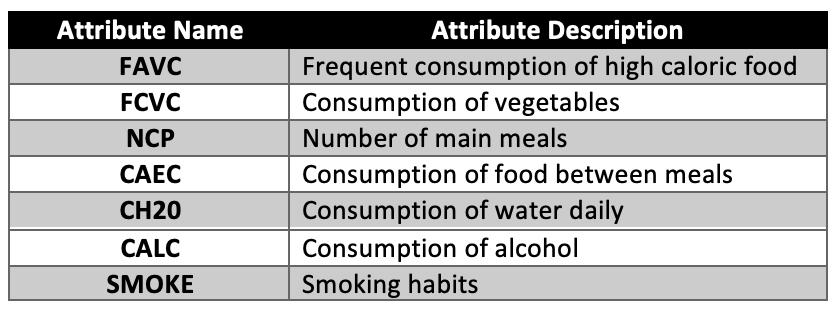

#### Physical condition related attributes:

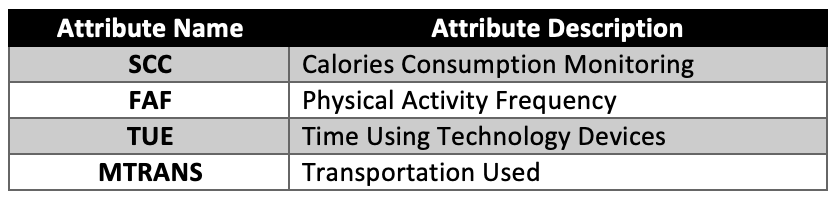

#### Other variables:

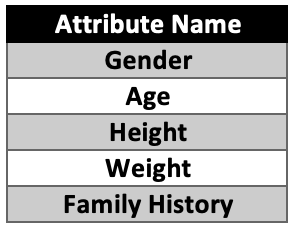

---

In [2]:
#Data handling libraries 
import pandas as pd 
import numpy as np

#Plotting libraries 
import matplotlib.pyplot as plt
import seaborn as sns

#ML and preprocessing libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

from scipy import stats
import math 

sns.set_style('darkgrid')

In [3]:
obesity_df = pd.read_csv('ObesityDataSet.csv')

As seen below, our data has 16 features, out of which 3 are numeric and rest are categorical. Our target class in this dataset is named "NObeyesdad". 

In [4]:
print(f"Our data has {obesity_df.shape[0]} observations and {obesity_df.shape[1]-1} features.")

Our data has 2111 observations and 16 features.


In [5]:
obesity_df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [6]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

There are no missing values in the data. However, as mentioned in the source of the data, the author has generated synthetic values (up to 77% of the data) in an effort to impute missing values and address the class imbalance. 

We can observe in by the "info" above that many of the categorical features have a float64 datatype. This needs to be preprocessed and explored further. 


## Exploratory Data Analysis

How are the subcategories in our target variable distributed? 

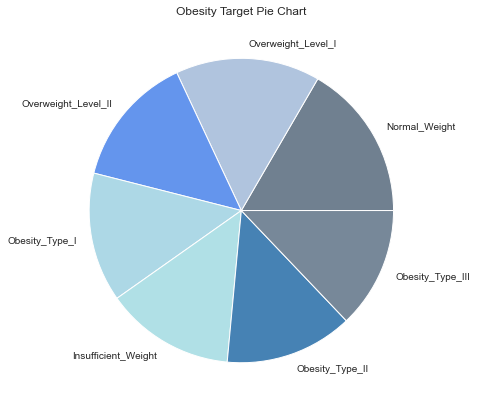

In [7]:
fig = plt.figure(figsize =(10, 7))
colors = ( "slategrey", "lightsteelblue", "cornflowerblue", "lightblue", "powderblue", "steelblue","lightslategrey")
plt.title("Obesity Target Pie Chart")
plt.pie(obesity_df["NObeyesdad"].value_counts(),labels = obesity_df["NObeyesdad"].unique(), colors = colors);

### Custom Class for EDA Plots: 

In [8]:
class EDA: 
    """
    A class used to produce basic EDA plots for both categorical and numeric features. 
    
    Class Attribute: 
    
    data : Pandas DataFrame object 
        the data you want to produce EDA for
    
    targetName : str
        the name of the target variable in the dataset
        
    Methods: 
    
    count_plot(varname, categorical)
        Produces a count plot if the variable passed is categorical, and a histogram if the variable is numeric
    
    cross_count_plot(category1, category2)
        Produces cross count plot, plotting counts of category2 against every category within category1 
    
    scatter_plot(numeric_x, numeric_y)
        Produces scatter plot between two numeric variables
    
    boxplot(num_cols, withtarget, order=None)
        Produces box plot for numeric features, either univariate or bivariate with target
    
    """
    
    def __init__(self, data, targetName):
        self.data = data  
        self.targetName=targetName
    
    def count_plot(self, varname, categorical):
        """Produces a count plot if the variable passed is categorical, and a histogram if the variable is numeric.
        
        Parameters
        ----------
        varname : str
            Name of variable to produce a count plot  
            
        categorical : Bool
            Flag for whether the variable is categorical or continuos
            
        """
        if categorical:
            ax = sns.countplot(x=self.data.loc[:,varname], data=self.data, palette = "flare")
            ax.set(title=f"Count Plot - {varname}")
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
            plt.show()
        else: 
            plt.hist(self.data.loc[:,varname], bins = "fd", color = "lightsteelblue")
            plt.axvline(self.data.loc[:,varname].mean(), color = "navy", label = "mean")
            plt.title(f"Histogram - {varname}")
            plt.xlabel(f"{varname}");
    
    def cross_count_plot(self, category1, category2):
        """
        Produces cross count plot, plotting counts of category2 against every category within category1.
        
        Parameters
        ----------
        category1 : str
            Name of variable to produce a count plot  
            
        category2 : str
            Flag for whether the variable is categorical or continuos
        """
            
        ax = sns.countplot(x = category1, hue = category2, data = self.data, palette = "dark:#5A9_r")
        ax.set(title = f"Count for {category2} against {category1}")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.show()
    
    def scatter_plot(self, numeric_x, numeric_y):
        """
        Produces scatter plot between two numeric variables
        
        Parameters
        ----------
        numeric_x : str
            Name of variable to plot on the x axis   
            
        numeric_y : str
            Name of variable to plot on the y axis
        """
        plt.scatter(self.data.loc[:,numeric_x], self.data.loc[:,numeric_y], color = "indianred", marker=".")
        plt.title(f"Scatter Plot: {numeric_y} against {numeric_x}")
        plt.xlabel(f"{numeric_x}")
        plt.ylabel(f"{numeric_y}");

    def boxplot(self, num_cols, withtarget, order=None):
        """
        Produces box plot for numeric features, either univariate or bivariate with target 
        
        Parameters
        ----------
        numcols : list
            list of numeric columns in the DataFrame   
            
        withtarget : Bool
            flag determining whether the box plot is univariate or bivariate with target 
        
        order : list (optional)
            for the bivariate plot, this is the order in which the subcategories of the target are to be displayed
        """
        if withtarget:
            for col in num_cols:
                sns.boxplot(y = self.data[self.targetName].astype('category'), x = col, data=self.data, order=order, palette = "blend:#7AB,#EDA").set(title=f"Box Plot of {col} Against Target")
                plt.show()
        else:  
            f, axes = plt.subplots(figsize = (12,6), dpi = 100, nrows = 1, ncols = 3)
            for k, col in enumerate(num_cols):
                axes[k].boxplot(list(self.data.loc[:,col]), notch=True,vert=True,patch_artist=True)
                axes[k].set_xlabel(f'{col}')
                axes[k].set_title(f'Boxplot for {col}');
    

### Exploring the Features Using the Custom Class

In [9]:
obesity_EDA = EDA(obesity_df, "NObeyesdad")

### **Categorical Variables:**

In [10]:
obesity_df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

We can see that the variables - FCVC, NCP, CH20, FAF, and TUE are numeric even though the variables are categorical. A histogram would help us understand the distribution of these values. We can use the custom EDA class here, setting the categorical flag to False. 

##### Consumption of Vegetables (FCVC) 

The historgram shows three modal values - 1,2,3 which are the three categories the subjects have answered in. This is a categorical variable. The values between 1 and 2, and 2 and 3 have no semantic meaning as they have been synthetically generated. In order to meaningfully utilize this variable, the decimal values would have to be recasted to the original modal values using a threshold. In this case, we can simply round the values using the series method round(). 

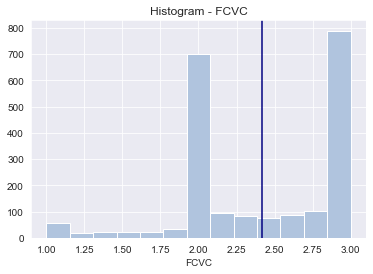

In [11]:
obesity_EDA.count_plot("FCVC", False)

In [12]:
obesity_df["FCVC_recasted"] = obesity_df.loc[:,"FCVC"].round()

We apply the same method to columns 'NCP', 'CH2O', 'FAF', 'TUE', where the same issue occurs, and drop the original columns.

In [13]:
obesity_df["NCP_recasted"] = obesity_df.loc[:,"NCP"].round()
obesity_df["CH2O_recasted"] = obesity_df.loc[:,"CH2O"].round()
obesity_df["FAF_recasted"] = obesity_df.loc[:,"FAF"].round()
obesity_df["TUE_recasted"] = obesity_df.loc[:,"TUE"].round()

In [14]:
obesity_df.drop("FCVC", inplace = True, axis = 1)
obesity_df.drop("NCP", inplace = True, axis = 1)
obesity_df.drop("CH2O", inplace = True, axis = 1)
obesity_df.drop("FAF", inplace = True, axis = 1)
obesity_df.drop("TUE", inplace = True, axis = 1)

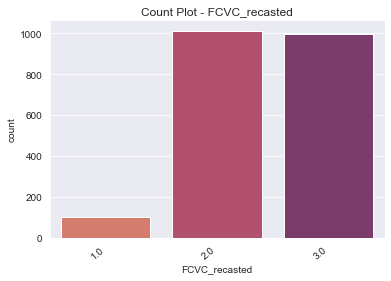

In [15]:
obesity_EDA.count_plot("FCVC_recasted", True)

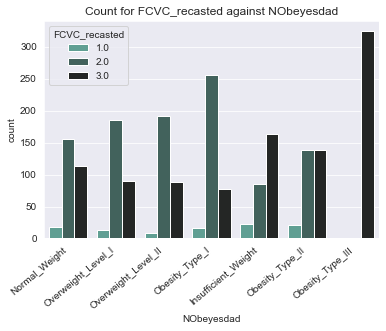

In [16]:
obesity_EDA.cross_count_plot("NObeyesdad", "FCVC_recasted")

##### Number of Main Meals (NCP) 

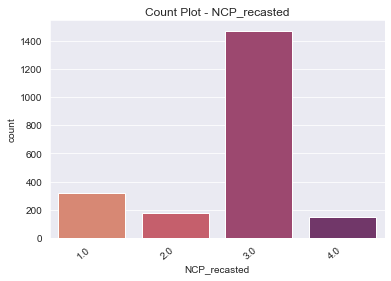

In [17]:
obesity_EDA.count_plot("NCP_recasted", True)

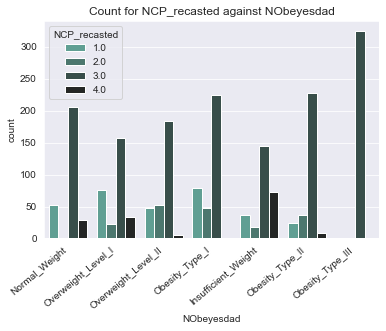

In [18]:
obesity_EDA.cross_count_plot("NObeyesdad", "NCP_recasted")

##### Consumption of Water Daily (CH2O) 

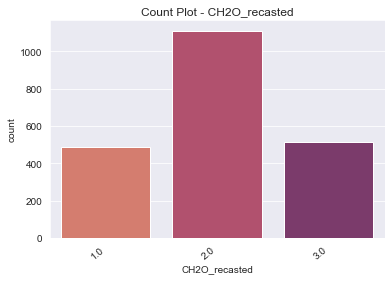

In [19]:
obesity_EDA.count_plot("CH2O_recasted", True)

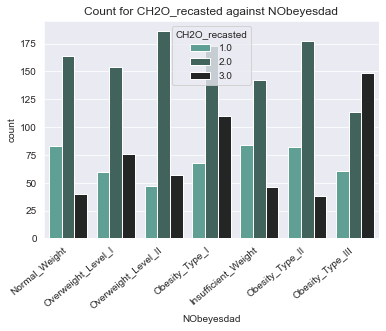

In [20]:
obesity_EDA.cross_count_plot("NObeyesdad", "CH2O_recasted")

##### Physical Activity Frequency (FAF) 

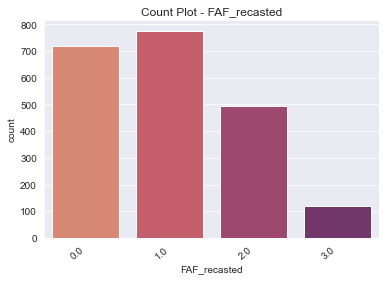

In [21]:
obesity_EDA.count_plot("FAF_recasted", True)

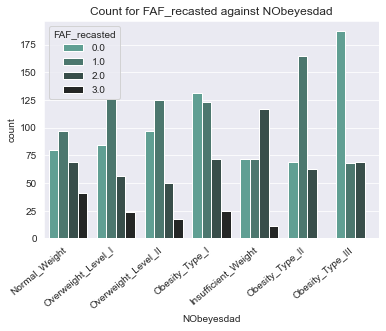

In [22]:
obesity_EDA.cross_count_plot("NObeyesdad", "FAF_recasted")

##### Time Using Technology Devices (TUE) 

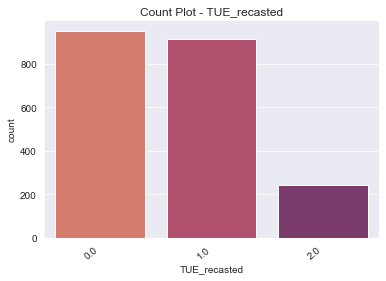

In [23]:
obesity_EDA.count_plot("TUE_recasted", True)

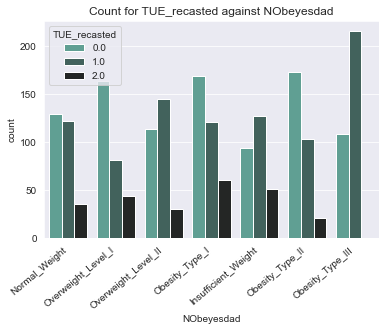

In [24]:
obesity_EDA.cross_count_plot("NObeyesdad", "TUE_recasted")

##### Gender

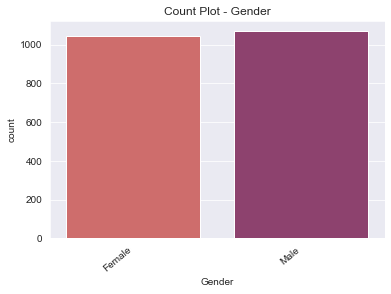

In [25]:
obesity_EDA.count_plot("Gender", True)

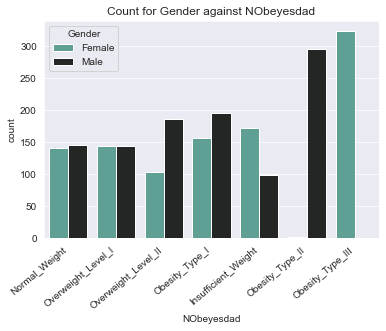

In [26]:
obesity_EDA.cross_count_plot("NObeyesdad", "Gender")

##### Family History of Being Overweight 

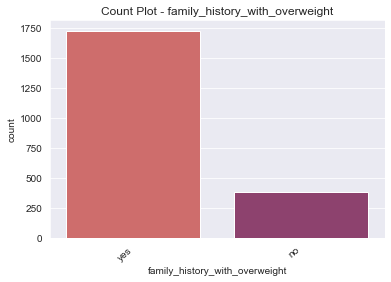

In [27]:
obesity_EDA.count_plot("family_history_with_overweight", True)

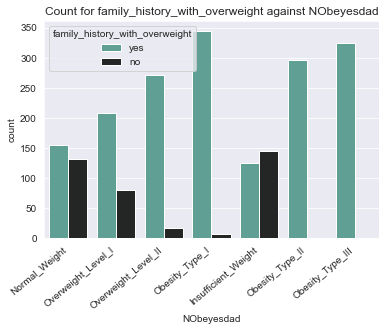

In [28]:
obesity_EDA.cross_count_plot("NObeyesdad", "family_history_with_overweight")

##### Frequent Consumption of High Caloric Food (FAVC) 

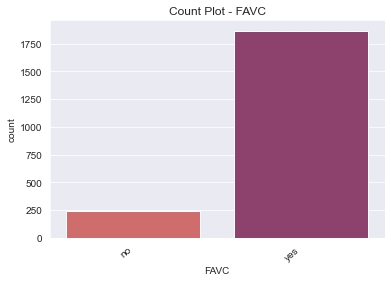

In [29]:
obesity_EDA.count_plot("FAVC", True)

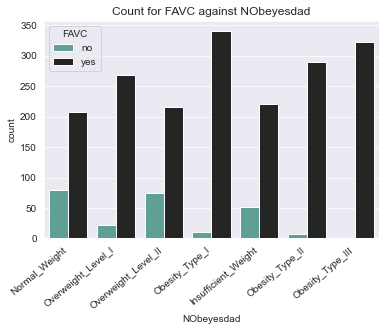

In [30]:
obesity_EDA.cross_count_plot("NObeyesdad", "FAVC")

##### Consumption of Food Between Meals (CEAC) 

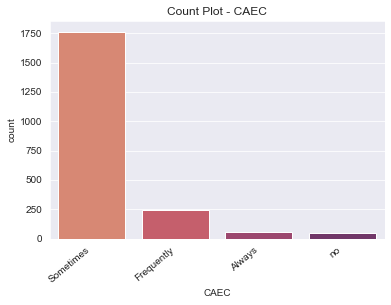

In [31]:
obesity_EDA.count_plot("CAEC", True)

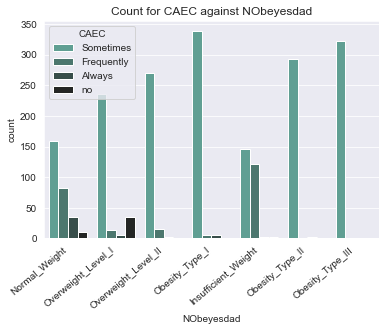

In [32]:
obesity_EDA.cross_count_plot("NObeyesdad", "CAEC")

##### Consumption of Alcohol (CALC) 

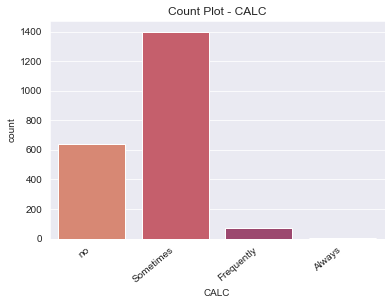

In [33]:
obesity_EDA.count_plot("CALC", True)

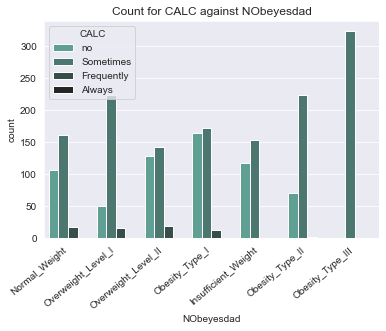

In [34]:
obesity_EDA.cross_count_plot("NObeyesdad", "CALC")

##### Smoking Habits (SMOKE) 

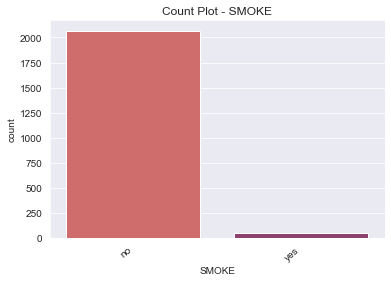

In [35]:
obesity_EDA.count_plot("SMOKE", True)

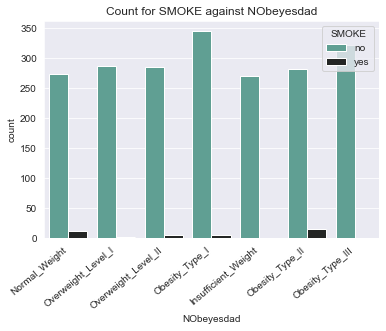

In [36]:
obesity_EDA.cross_count_plot("NObeyesdad", "SMOKE")

##### Calories Consumption Monitoring (SCC) 

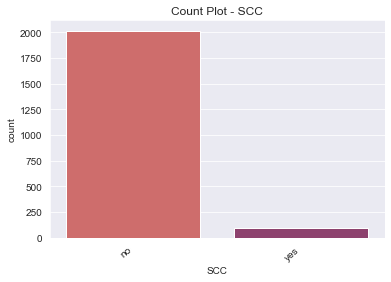

In [37]:
obesity_EDA.count_plot("SCC", True)

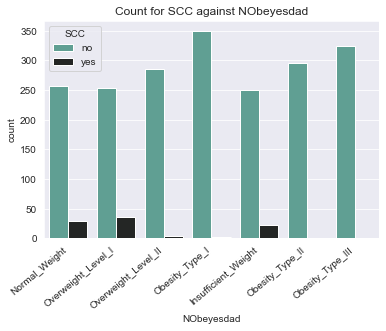

In [38]:
obesity_EDA.cross_count_plot("NObeyesdad", "SCC")

##### Transportation Used (MTRANS) 

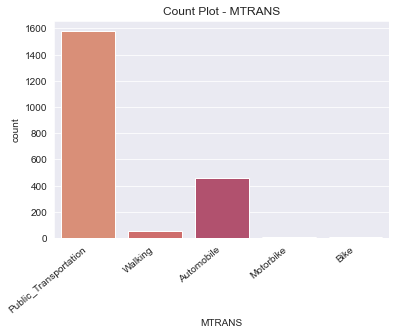

In [39]:
obesity_EDA.count_plot("MTRANS", True)

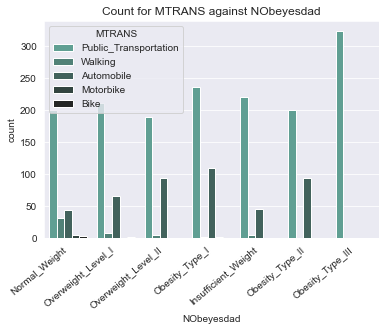

In [40]:
obesity_EDA.cross_count_plot("NObeyesdad", "MTRANS")

### Numeric Variables - Age, Height and Weight

In [41]:
obesity_df[['Age', 'Height', 'Weight']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00


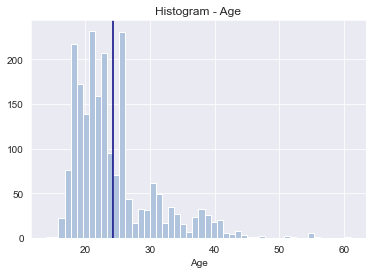

In [42]:
obesity_EDA.count_plot("Age", False)

The Shapiro-Wilk test can be used to check the normal distribution of residuals. 

H0: data is drawn from a normal distribution.

H1: data is not drawn from a normal distribution.

In [43]:
import scipy.stats as stats
w_age, pvalue_age = stats.shapiro(obesity_df['Age'])
print(w_age, pvalue_age)

0.8660634756088257 3.517112009116537e-39


As the p value is significant, we reject null hypothesis and conclude that age is not drawn from normal distribution.

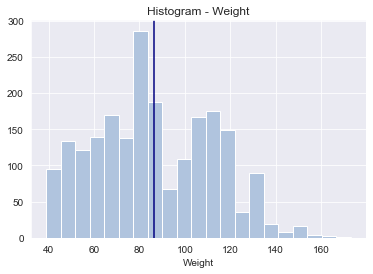

In [44]:
obesity_EDA.count_plot("Weight", False)

In [45]:
w_weight, pvalue_weight = stats.shapiro(obesity_df['Weight'])
print(w_weight, pvalue_weight)

0.9764994382858276 3.76608053706003e-18


As the p value is significant, we reject null hypothesis and conclude that weight is not drawn from normal distribution.

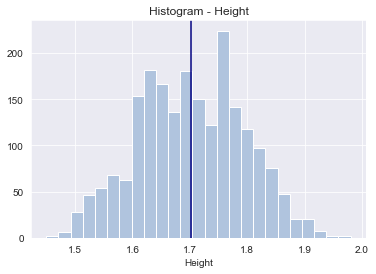

In [46]:
obesity_EDA.count_plot("Height", False)

In [47]:
w_height, pvalue_height = stats.shapiro(obesity_df['Height'])
print(w_height, pvalue_height)

0.993234395980835 2.7733422669484753e-08


As the p value is significant, we reject null hypothesis and conclude that height is not drawn from a normal distribution.

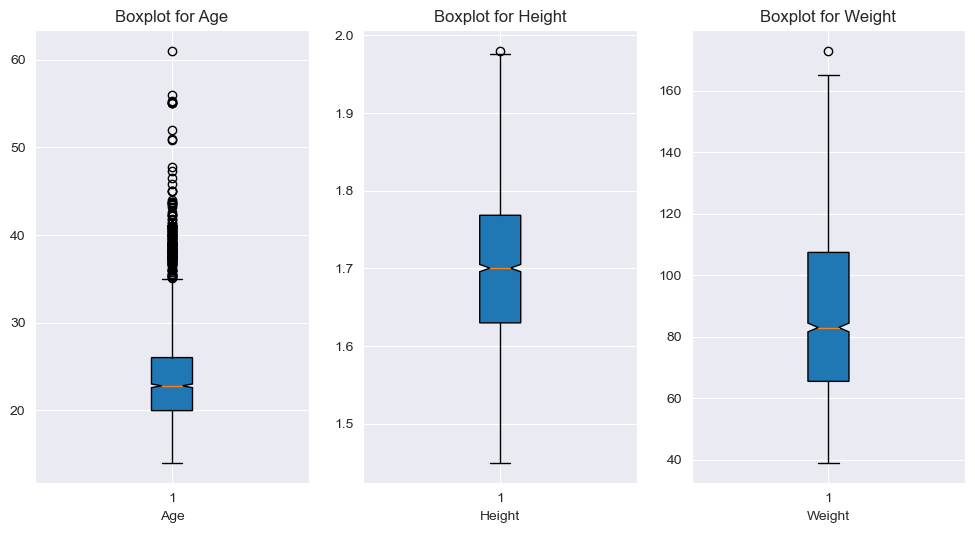

In [48]:
obesity_EDA.boxplot(["Age","Height","Weight"], False)

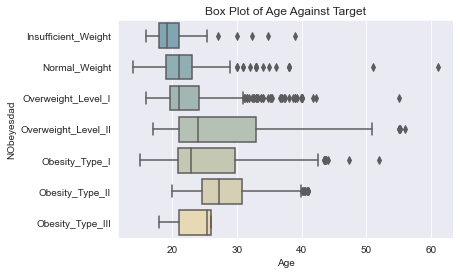

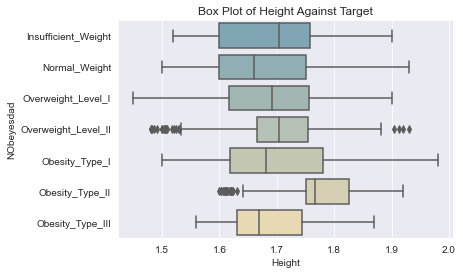

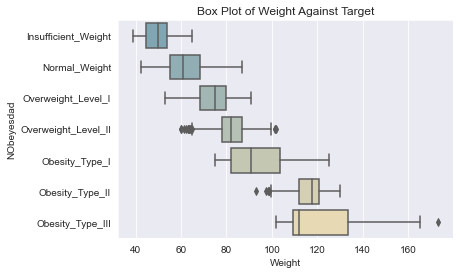

In [49]:
order=['Insufficient_Weight','Normal_Weight',
                      'Overweight_Level_I','Overweight_Level_II',
                      'Obesity_Type_I',
                      'Obesity_Type_II','Obesity_Type_III']

obesity_EDA.boxplot(["Age","Height","Weight"], True, order = order)

We observe a positive relationship between weight and obesity, but no clear relationship between height and obesity, and age and obesity.

In [50]:
obesity_df.groupby('NObeyesdad')[["Age", "Height", "Weight"]].mean().sort_values(by=['Weight'])

,Age,Height,Weight
NObeyesdad,,,
Insufficient_Weight,19.783237,1.691117,49.906330
Normal_Weight,21.738676,1.676585,62.155052
Overweight_Level_I,23.417674,1.687836,74.266828
Overweight_Level_II,26.996981,1.703748,82.085271
Obesity_Type_I,25.884941,1.693804,92.870198
Obesity_Type_II,28.233785,1.771795,115.305311
Obesity_Type_III,23.495554,1.687559,120.941114


In [51]:
obesity_df.groupby('NObeyesdad')[["Age", "Height", "Weight"]].min().sort_values(by=['Weight'])

,Age,Height,Weight
NObeyesdad,,,
Insufficient_Weight,16.0,1.52,39.0
Normal_Weight,14.0,1.50,42.3
Overweight_Level_I,16.0,1.45,53.0
Overweight_Level_II,17.0,1.48,60.0
Obesity_Type_I,15.0,1.50,75.0
Obesity_Type_II,20.0,1.60,93.0
Obesity_Type_III,18.0,1.56,102.0


In [52]:
obesity_df.groupby('NObeyesdad')[["Age", "Height", "Weight"]].max().sort_values(by=['Weight'])

,Age,Height,Weight
NObeyesdad,,,
Insufficient_Weight,39.0,1.90,65.0
Normal_Weight,61.0,1.93,87.0
Overweight_Level_I,55.0,1.90,91.0
Overweight_Level_II,56.0,1.93,102.0
Obesity_Type_I,52.0,1.98,125.0
Obesity_Type_II,41.0,1.92,130.0
Obesity_Type_III,26.0,1.87,173.0


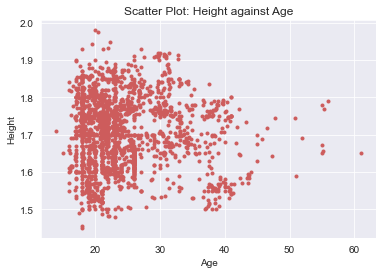

In [53]:
obesity_EDA.scatter_plot("Age", "Height")

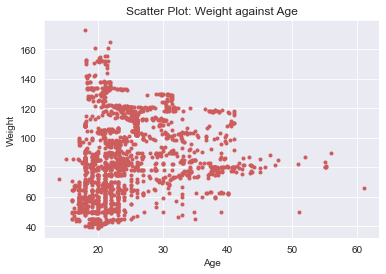

In [54]:
obesity_EDA.scatter_plot("Age", "Weight")

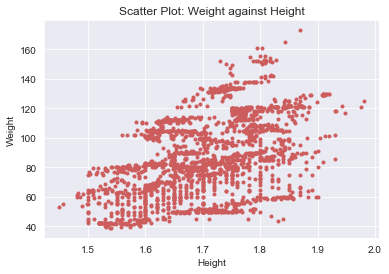

In [55]:
obesity_EDA.scatter_plot("Height", "Weight")

There seems to be some positive correlation between height and weight. 

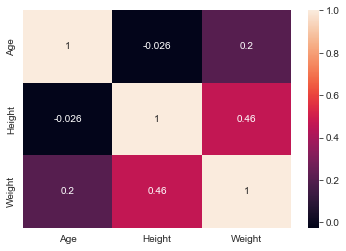

In [56]:
cor_mat = obesity_df[['Age', 'Height', 'Weight']].corr()
sns.heatmap(cor_mat, annot=True);

Correlation between Height and Weight is 0.46, which is not too high. 

### Analyzing Categorical Variables - Chi Square 

We create a dataframe with only categorical variables and explore the relationship between each feature and the target variable 'NObeyesdad'.

In [57]:
obesity_cat=obesity_df.drop(['Age','Weight', 'Height'], axis=1)

#### Hypothesis testing using Chi-Square test

Null Hypothesis (H0): 'NObeyesdad' and each categorical variable are independent.

Alternate Hypothesis (H1): 'NObeyesdad' and each categorical variable are not independent.

In [58]:
label_encoder = LabelEncoder()
for column in obesity_cat[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']]:
    obesity_cat[column] = label_encoder.fit_transform(obesity_cat[column])

In [59]:
obesity_cat.head(10)

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,FCVC_recasted,NCP_recasted,CH2O_recasted,FAF_recasted,TUE_recasted
0,0,1,0,2,0,0,3,3,Normal_Weight,2.0,3.0,2.0,0.0,1.0
1,0,1,0,2,1,1,2,3,Normal_Weight,3.0,3.0,3.0,3.0,0.0
2,1,1,0,2,0,0,1,3,Normal_Weight,2.0,3.0,2.0,2.0,1.0
3,1,0,0,2,0,0,1,4,Overweight_Level_I,3.0,3.0,2.0,2.0,0.0
4,1,0,0,2,0,0,2,3,Overweight_Level_II,2.0,1.0,2.0,0.0,0.0
5,1,0,1,2,0,0,2,0,Normal_Weight,2.0,3.0,2.0,0.0,0.0
6,0,1,1,2,0,0,2,2,Normal_Weight,3.0,3.0,2.0,1.0,0.0
7,1,0,0,2,0,0,2,3,Normal_Weight,2.0,3.0,2.0,3.0,0.0
8,1,1,1,2,0,0,1,3,Normal_Weight,3.0,3.0,2.0,1.0,1.0
9,1,1,1,2,0,0,3,3,Normal_Weight,2.0,3.0,2.0,1.0,1.0


In [60]:
X = obesity_cat.drop('NObeyesdad',axis=1)

In our model, we will be interested in exploring the relationship between our predictors and whether or not a person is obese. We will convert 'NObeyesdad' to binary data, indicating whether a person falls into one of the categories 'Obesity Type I', 'Obesity Type II', Obesity Type III', ('1') or none of the above ('0').

In [61]:
obesity_cat['NObeyesdad'] = np.where((obesity_cat['NObeyesdad'].isin(['Insufficient_Weight','Normal_Weight',
                                                                      'Overweight_Level_I','Overweight_Level_II'])), 0, 1)

In [62]:
obesity_cat.head(10)

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,FCVC_recasted,NCP_recasted,CH2O_recasted,FAF_recasted,TUE_recasted
0,0,1,0,2,0,0,3,3,0,2.0,3.0,2.0,0.0,1.0
1,0,1,0,2,1,1,2,3,0,3.0,3.0,3.0,3.0,0.0
2,1,1,0,2,0,0,1,3,0,2.0,3.0,2.0,2.0,1.0
3,1,0,0,2,0,0,1,4,0,3.0,3.0,2.0,2.0,0.0
4,1,0,0,2,0,0,2,3,0,2.0,1.0,2.0,0.0,0.0
5,1,0,1,2,0,0,2,0,0,2.0,3.0,2.0,0.0,0.0
6,0,1,1,2,0,0,2,2,0,3.0,3.0,2.0,1.0,0.0
7,1,0,0,2,0,0,2,3,0,2.0,3.0,2.0,3.0,0.0
8,1,1,1,2,0,0,1,3,0,3.0,3.0,2.0,1.0,1.0
9,1,1,1,2,0,0,3,3,0,2.0,3.0,2.0,1.0,1.0


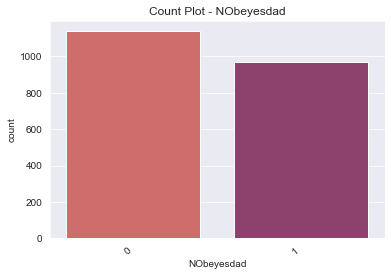

In [63]:
obesity_cat_EDA = EDA(obesity_cat, "NObeyesdad")
obesity_cat_EDA.count_plot("NObeyesdad", True)

In [64]:
not_ob = obesity_cat['NObeyesdad'].value_counts()[0]
ob= obesity_cat['NObeyesdad'].value_counts()[1]
print(f"The number of non obese records = {not_ob}")
print(f"The number of obese records = {ob}")

The number of non obese records = 1139
The number of obese records = 972


In [65]:
y = obesity_cat['NObeyesdad']

In [66]:
chi_scores = chi2(X,y)

In [67]:
chi_scores

(array([2.15159305e-03, 6.68210106e+01, 1.89829950e+01, 1.35042117e+01,
        2.77099434e-01, 7.11815759e+01, 1.34968999e+00, 7.27154943e-03,
        6.42431434e+00, 3.89555539e-01, 4.86907757e+00, 3.68333418e+01,
        5.30592859e+00]),
 array([9.63003179e-01, 2.97312369e-16, 1.31888648e-05, 2.38028620e-04,
        5.98608683e-01, 3.25816439e-17, 2.45332320e-01, 9.32044054e-01,
        1.12568363e-02, 5.32533122e-01, 2.73421119e-02, 1.28670810e-09,
        2.12529677e-02]))

In [68]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

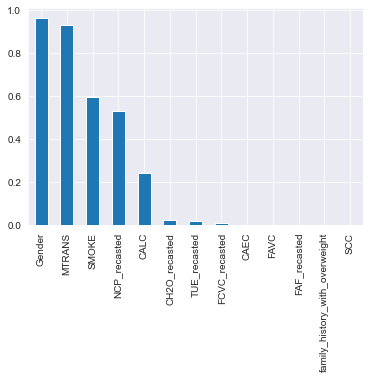

In [69]:
p_values.plot.bar();

For features with p-values < 0.05, we reject the null hypothesis that the features and the target are independent. We therefore select these features for our model.

In [70]:
p_values

Gender                            9.630032e-01
MTRANS                            9.320441e-01
SMOKE                             5.986087e-01
NCP_recasted                      5.325331e-01
CALC                              2.453323e-01
CH2O_recasted                     2.734211e-02
TUE_recasted                      2.125297e-02
FCVC_recasted                     1.125684e-02
CAEC                              2.380286e-04
FAVC                              1.318886e-05
FAF_recasted                      1.286708e-09
family_history_with_overweight    2.973124e-16
SCC                               3.258164e-17
dtype: float64

In [71]:
features=p_values[(p_values < 0.05)].index

In [72]:
features

Index(['CH2O_recasted', 'TUE_recasted', 'FCVC_recasted', 'CAEC', 'FAVC',
       'FAF_recasted', 'family_history_with_overweight', 'SCC'],
      dtype='object')

In [73]:
X_cat=obesity_cat[features]

In [74]:
X_cat

,CH2O_recasted,TUE_recasted,FCVC_recasted,CAEC,FAVC,FAF_recasted,family_history_with_overweight,SCC
0,2.0,1.0,2.0,2,0,0.0,1,0
1,3.0,0.0,3.0,2,0,3.0,1,1
2,2.0,1.0,2.0,2,0,2.0,1,0
3,2.0,0.0,3.0,2,0,2.0,0,0
4,2.0,0.0,2.0,2,0,0.0,0,0
...,...,...,...,...,...,...,...,...
2106,2.0,1.0,3.0,2,1,2.0,1,0
2107,2.0,1.0,3.0,2,1,1.0,1,0
2108,2.0,1.0,3.0,2,1,1.0,1,0
2109,3.0,1.0,3.0,2,1,1.0,1,0


### Hypothesis testing using Mann-Whitney U test

Null Hypothesis (H0): 'NObeyesdad' and each numerical variable are independent.

Alternate Hypothesis (H1): 'NObeyesdad' and each numerical variable are not independent.

In [75]:
obesity_num=obesity_df[['Age','Weight', 'Height',]]

In [76]:
obesity_num=pd.merge(obesity_num,obesity_cat['NObeyesdad'],left_index=True,right_index=True)

In [77]:
obesity_num

,Age,Weight,Height,NObeyesdad
0,21.000000,64.000000,1.620000,0
1,21.000000,56.000000,1.520000,0
2,23.000000,77.000000,1.800000,0
3,27.000000,87.000000,1.800000,0
4,22.000000,89.800000,1.780000,0
...,...,...,...,...
2106,20.976842,131.408528,1.710730,1
2107,21.982942,133.742943,1.748584,1
2108,22.524036,133.689352,1.752206,1
2109,24.361936,133.346641,1.739450,1


In [78]:
obesity_num.groupby('NObeyesdad')[["Age", "Height", "Weight"]].mean()

,Age,Height,Weight
NObeyesdad,,,
0,23.038007,1.689836,67.388174
1,25.806181,1.715553,109.082344


In [79]:
obesity_num.groupby('NObeyesdad')[["Age", "Height", "Weight"]].std()

,Age,Height,Weight
NObeyesdad,,,
0,6.422132,0.095284,14.619766
1,5.918980,0.088995,17.355499


In [80]:
non_ob=obesity_num[obesity_num["NObeyesdad"] ==0]
ob=obesity_num[obesity_num["NObeyesdad"] ==1]

In [81]:
non_ob

,Age,Weight,Height,NObeyesdad
0,21.000000,64.000000,1.620000,0
1,21.000000,56.000000,1.520000,0
2,23.000000,77.000000,1.800000,0
3,27.000000,87.000000,1.800000,0
4,22.000000,89.800000,1.780000,0
...,...,...,...,...
1204,35.432059,80.135167,1.663178,0
1205,33.864257,77.355417,1.679299,0
1206,23.807181,82.527240,1.729177,0
1207,39.585811,86.464843,1.719153,0


In [82]:
ob

,Age,Weight,Height,NObeyesdad
10,26.000000,105.000000,1.850000,1
13,41.000000,99.000000,1.800000,1
17,29.000000,78.000000,1.530000,1
21,52.000000,87.000000,1.690000,1
23,22.000000,82.000000,1.600000,1
...,...,...,...,...
2106,20.976842,131.408528,1.710730,1
2107,21.982942,133.742943,1.748584,1
2108,22.524036,133.689352,1.752206,1
2109,24.361936,133.346641,1.739450,1


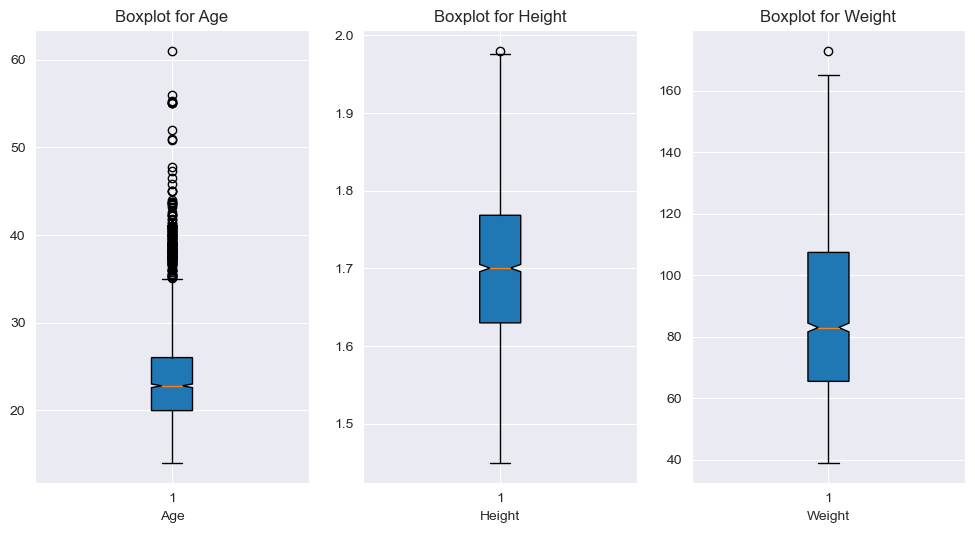

In [83]:
obesity_num_EDA = EDA(obesity_num, "NObeyesdad")
obesity_num_EDA.boxplot(['Age', 'Height', 'Weight'], False)

We previously observed that 'Height', 'Weight' and 'Age' are not drawn from a normal distribution. We use the Mann-Whitney U-test to test our hypotheses.

In [84]:
t_h,p_h = stats.mannwhitneyu(non_ob['Height'], ob['Height'])
print('Mann-Whitney U test results for Height: t = %g  p = %g' % (t_h, p_h))

t_a,p_a = stats.mannwhitneyu(non_ob['Age'], ob['Age'])
print('Mann-Whitney U test results for Age: t = %g  p = %g' % (t_a, p_a))

t_w,p_w = stats.mannwhitneyu(non_ob['Weight'], ob['Weight'], alternative = 'less')
print('Mann-Whitney U test results for Weight: t = %g  p = %g' % (t_w, p_w))

Mann-Whitney U test results for Height: t = 470428  p = 2.59747e-09
Mann-Whitney U test results for Age: t = 345893  p = 4.40363e-50
Mann-Whitney U test results for Weight: t = 36878  p = 3.26758e-300


The p-values are statistically significant for all 3 tests. Therefore, we reject the null hypothesis that Age, Height and Weight have no impact on obesity, and conclude that there is a relationship between each variable and obesity. Since obesity level is determined through a BMI score calculated using weight and height, and we previously observed an apparent positive relationship between obesity level and weight, we decide to drop 'Weight' from our model to explore the impact of the rest of the predictors on obesity level.

In [85]:
data = pd.merge(X_cat, obesity_df[['Age']], left_index=True, right_index=True)
data['Obesity'] = y
data

,CH2O_recasted,TUE_recasted,FCVC_recasted,CAEC,FAVC,FAF_recasted,family_history_with_overweight,SCC,Age,Obesity
0,2.0,1.0,2.0,2,0,0.0,1,0,21.000000,0
1,3.0,0.0,3.0,2,0,3.0,1,1,21.000000,0
2,2.0,1.0,2.0,2,0,2.0,1,0,23.000000,0
3,2.0,0.0,3.0,2,0,2.0,0,0,27.000000,0
4,2.0,0.0,2.0,2,0,0.0,0,0,22.000000,0
...,...,...,...,...,...,...,...,...,...,...
2106,2.0,1.0,3.0,2,1,2.0,1,0,20.976842,1
2107,2.0,1.0,3.0,2,1,1.0,1,0,21.982942,1
2108,2.0,1.0,3.0,2,1,1.0,1,0,22.524036,1
2109,3.0,1.0,3.0,2,1,1.0,1,0,24.361936,1


### Prediction Model - Logistic Regression

In [86]:
class prepData:
    """
    A class used to prepare the data for modelling. 
    
    Class Attribute: 
    
    data : Pandas DataFrame object 
        the data you want to produce EDA for
    
    targetName : str
        the name of the target variable in the dataset
        
    Methods: 
    
    load_data()
        Splits the data into X and y - features, and target DataFrames 
    
    input_prep(data, numeric_cols)
        Prepares input features for modelling - creates dummys for the categorical variables 
        and min max scales the numeric variables 
    
    """
    def __init__(self, data, targetName):
        self.data = data
        self.targetName = targetName
        
    def load_data(self):
        """
        Splits the data into X and y - features, and target DataFrames
        returns: X, y DataFrames
        
        """
        X = self.data.loc[:,  self.data.columns!=self.targetName]
        y = self.data.loc[:,  self.targetName]
        return X,y 
        
    def input_prep(self, data, numeric_cols):
        """
        Prepares input features for modelling - creates dummys for the categorical variables 
        and min max scales the numeric variables
        
        Parameters
        ----------
        data : DataFrame
            A dataframe containing only input features 
        
        numeric_cols: List 
            A list of all the columns of numeric type 
        """
        categorical_cols = [c for c in data.columns if c not in numeric_cols]
        new_input = pd.get_dummies(data,columns=categorical_cols)
        for col in numeric_cols:
            max_value = data[col].max()
            min_value = data[col].min()
            new_input[col] = (data[col] - min_value) / (max_value - min_value)
        return new_input

In [87]:
obesity_prep = prepData(data, "Obesity")

In [88]:
X, y = obesity_prep.load_data()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [90]:
X_train_prepped = obesity_prep.input_prep(X_train, ["Age"])
X_test_prepped = obesity_prep.input_prep(X_test, ["Age"])

In [91]:
X_train_prepped

,Age,CH2O_recasted_1.0,CH2O_recasted_2.0,CH2O_recasted_3.0,TUE_recasted_0.0,TUE_recasted_1.0,TUE_recasted_2.0,FCVC_recasted_1.0,FCVC_recasted_2.0,FCVC_recasted_3.0,...,FAVC_0,FAVC_1,FAF_recasted_0.0,FAF_recasted_1.0,FAF_recasted_2.0,FAF_recasted_3.0,family_history_with_overweight_0,family_history_with_overweight_1,SCC_0,SCC_1
2075,0.177717,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,1,0
113,0.193957,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,1,0
1140,0.198461,0,1,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,1,1,0
2011,0.227052,0,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,1,0
1628,0.478822,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.137513,0,0,1,1,0,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0
1731,0.401369,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,1,0
763,0.169712,0,0,1,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
835,0.371437,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,1,0


### Logistic Regression

In [92]:
labels={'FAVC':'Frequent consumption of high caloric food', 
        'FCVC':'Frequency of consumption of vegetables', 
        'NCP':'Number of main meals', 
        'CAEC':'Consumption of food between meals',
        'CH2O': 'Consumption of water daily', 
        'CALC':'Consumption of alcohol', 
        'SCC': 'Calories consumption monitoring', 
        'FAF': 'Physical activity frequency', 
        'TUE': 'Time using technology devices', 
        'MTRANS': 'Transportation used',
        'family_history_with_overweight': 'Family history with overweight'}

In [93]:
model = LogisticRegression()
model.fit(X_train_prepped, y_train)
y_pred = model.predict(X_test_prepped)
score = model.score(X_test_prepped, y_test)
print(score)

0.7878787878787878


              precision    recall  f1-score   support

           0       0.83      0.76      0.79       281
           1       0.75      0.82      0.78       247

    accuracy                           0.79       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.79      0.79      0.79       528



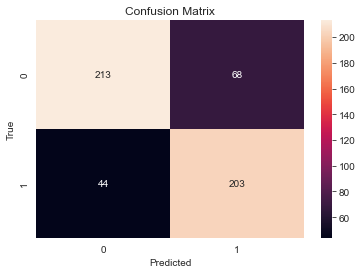

In [94]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

The model accurately predicts 204 data points in one of the obese categories, and 213 data points not in one of the obese categories. It falsely predicts 43 non-obese observations as obese, and 68 obese observations as non-obese.

Precision: Out of all obese participants predicted by the model, 75% actually are.

Recall: Out of all obese participants, the model predicted this outcome correctly for 83% of those participants.

Overall, the model has a 79% accuracy.

In [95]:
parameters = model.coef_
feats=model.feature_names_in_

coef_dict = {}
for coef, feat in zip(parameters[0,:], feats):
    coef_dict[feat] = coef

    
coef = pd.DataFrame([coef_dict])
coef

,Age,CH2O_recasted_1.0,CH2O_recasted_2.0,CH2O_recasted_3.0,TUE_recasted_0.0,TUE_recasted_1.0,TUE_recasted_2.0,FCVC_recasted_1.0,FCVC_recasted_2.0,FCVC_recasted_3.0,...,FAVC_0,FAVC_1,FAF_recasted_0.0,FAF_recasted_1.0,FAF_recasted_2.0,FAF_recasted_3.0,family_history_with_overweight_0,family_history_with_overweight_1,SCC_0,SCC_1
0,1.501525,0.022402,-0.315107,0.291579,0.188277,0.13922,-0.328624,-0.036749,-0.381768,0.417391,...,-1.064502,1.063375,0.516994,0.269458,-0.012196,-0.775383,-1.578763,1.577637,0.812623,-0.813749


In [96]:
for col in coef.columns:
    for key in labels:
        if str(key) in str(col):
            if "1" in str(col):
                coef.rename(columns={col: str(labels[key])+" 1"}, inplace=True)
            elif "3" in str(col):
                coef.rename(columns={col: str(labels[key])+" 3"}, inplace=True)
            elif "2" in str(col):
                coef.rename(columns={col: str(labels[key])+" 2"}, inplace=True)
            elif "4" in str(col):
                coef.rename(columns={col: str(labels[key])+" 4"}, inplace=True)
            elif "0" in str(col):
                coef.rename(columns={col: str(labels[key])+" 0"}, inplace=True)

In [97]:
coef=coef.transpose()
coef.columns=['coefs']
coef['odds_ratio'] = pow(math.e, coef['coefs'])

In [98]:
coef = coef.sort_values(by=['coefs'],ascending=False)
coef_abs=coef.abs()
coef_abs.sort_values(by=['coefs'],ascending=False).head(7)

,coefs,odds_ratio
Consumption of food between meals 1,1.759223,0.172179
Family history with overweight 0,1.578763,0.206230
Family history with overweight 1,1.577637,4.843496
Age,1.501525,4.488529
Consumption of food between meals 2,1.400178,4.055923
Frequent consumption of high caloric food 0,1.064502,0.344900
Frequent consumption of high caloric food 1,1.063375,2.896130


In [102]:
coef_abs.sort_values(by=['coefs'],ascending=False)

,coefs,odds_ratio
Consumption of food between meals 1,1.759223,0.172179
Family history with overweight 0,1.578763,0.206230
Family history with overweight 1,1.577637,4.843496
Age,1.501525,4.488529
Consumption of food between meals 2,1.400178,4.055923
Frequent consumption of high caloric food 0,1.064502,0.344900
Frequent consumption of high caloric food 1,1.063375,2.896130
Calories consumption monitoring 1,0.813749,0.443193
Calories consumption monitoring 0,0.812623,2.253812
Physical activity frequency 3,0.775383,0.460527


#### Plot of Coefficients 

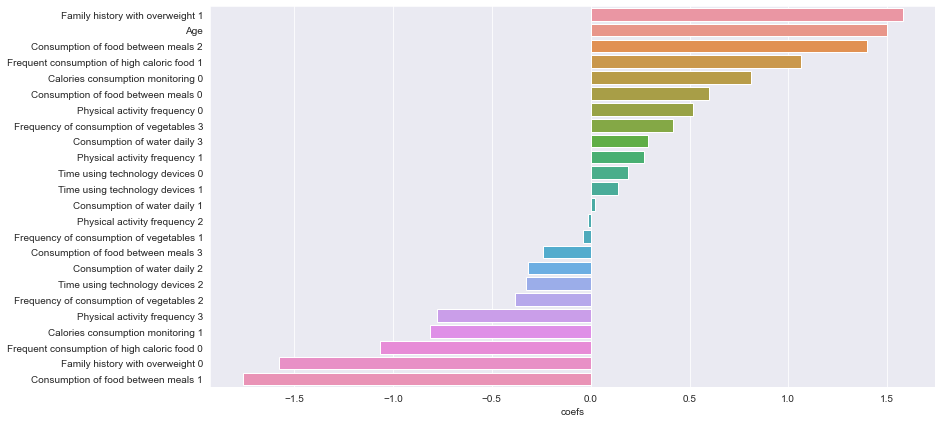

In [99]:
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(x='coefs', y=coef.index,data=coef);

#### Plot of Odds Ratios

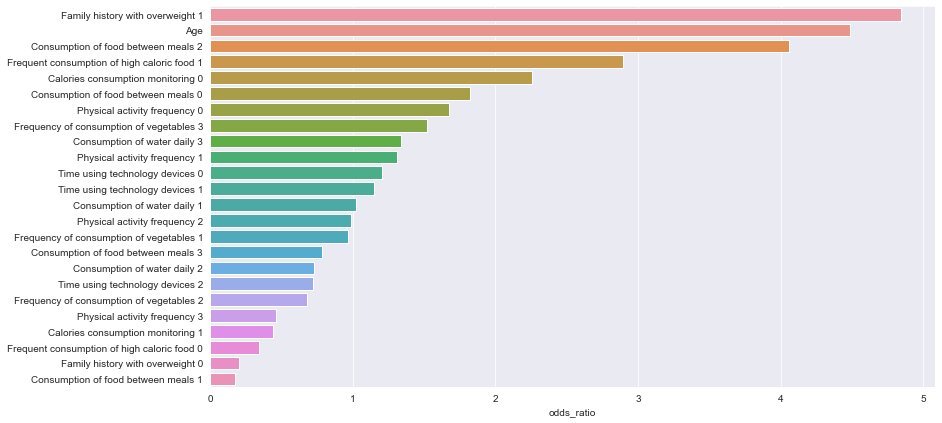

In [100]:
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(x='odds_ratio', y=coef.index,data=coef);

According to our model, the most important factors in predicting obesity is consumption of food between meals, age, family history with overweight, and frequent consumption of high caloric food. This suggests that genetics could play a factor obesity. Food intake is also important to keep in mind in obesity prevention recommendations.